In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [4]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  /home/dh3553/projects/fairness-variance


# Visualizations

In [5]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [6]:
EXPERIMENT_NAME = 'out_of_domain_uncertainty_poor_income_10K'
DB_COLLECTION_NAME = 'out_of_domain_uncertainty'
DATASET_NAME = 'Folktables_2018_Income'
EXPERIMENT_SESSION_UUID = '55cb3a96-48b7-43bb-8f42-9590e2c344cc'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'SEX&RAC1P']
MODEL_NAMES = ['RandomForestClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(76, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.792376,1.000000,0.000000,0.847590,1.000000,0.000000,0.761561,1.000000,0.000000,0.803500
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.736986,1.000000,0.000000,0.756952,1.000000,0.000000,0.728545,1.000000,0.000000,0.742500
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-18 16:44:06.030,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.791700,1.000000,0.000000,0.846154,1.000000,0.000000,0.761171,1.000000,0.000000,0.802600
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-18 16:44:06.042,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.732261,1.000000,0.000000,0.751720,1.000000,0.000000,0.724457,1.000000,0.000000,0.737850
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.670708,0.622415,0.855012,0.636536,0.596577,0.858758,0.684315,0.632460,0.849936,0.661023
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.695630,0.643955,0.840428,0.681498,0.629274,0.844147,0.695959,0.644138,0.835038,0.688855
6,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,0,OK,2023-10-18 16:44:06.030,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.659453,0.609458,0.849470,0.622425,0.580698,0.851923,0.672603,0.618740,0.844269,0.648141
7,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_2018_Income,200,1,OK,2023-10-18 16:44:06.042,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.679032,0.625812,0.824589,0.662849,0.608104,0.828600,0.680888,0.628119,0.819628,0.672026
8,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.622978,1.000000,0.000000,0.599892,1.000000,0.000000,0.633033,1.000000,0.000000,0.621168
9,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.683503,1.000000,0.000000,0.638729,1.000000,0.000000,0.705091,1.000000,0.000000,0.677633


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
0,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.792376,1.000000,0.000000,0.847590,1.000000,0.000000,0.761561,1.000000,0.000000,0.803500
4,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.670708,0.622415,0.855012,0.636536,0.596577,0.858758,0.684315,0.632460,0.849936,0.661023
8,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.622978,1.000000,0.000000,0.599892,1.000000,0.000000,0.633033,1.000000,0.000000,0.621168
12,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.463303,0.000000,1.000000,0.462355,0.000000,1.000000,0.463340,0.000000,1.000000,0.463000
16,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.087519,0.000000,1.000000,0.068768,0.000000,1.000000,0.098703,0.000000,1.000000,0.082286
20,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.083552,0.076390,0.110886,0.077041,0.071187,0.109597,0.086380,0.078820,0.110526,0.081827
24,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.091345,0.066158,0.187467,0.072597,0.052613,0.183728,0.100144,0.073567,0.185029,0.086715
28,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.869244,0.906529,0.726953,0.896484,0.926060,0.732005,0.856732,0.896098,0.730998,0.876111
32,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.690128,0.714657,0.596516,0.734662,0.762130,0.581902,0.666429,0.685284,0.606207,0.699693
36,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,0,OK,2023-10-18 16:39:43.591,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.688230,0.638489,0.878062,0.652493,0.611377,0.881151,0.702543,0.649166,0.873028,0.678144


In [13]:
exp_subgroup_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][1].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,...,SEX&RAC1P_priv,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall
1,Accuracy,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.736986,1.000000,0.000000,0.756952,1.000000,0.000000,0.728545,1.000000,0.000000,0.742500
5,Aleatoric_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.695630,0.643955,0.840428,0.681498,0.629274,0.844147,0.695959,0.644138,0.835038,0.688855
9,F1,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.683503,1.000000,0.000000,0.638729,1.000000,0.000000,0.705091,1.000000,0.000000,0.677633
13,FNR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.433195,0.000000,1.000000,0.477035,0.000000,1.000000,0.410645,0.000000,1.000000,0.438448
17,FPR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.092113,0.000000,1.000000,0.079881,0.000000,1.000000,0.100910,0.000000,1.000000,0.089161
21,IQR,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.086429,0.079484,0.105889,0.083465,0.076541,0.105029,0.086748,0.079753,0.105521,0.085135
25,Jitter,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.096946,0.072880,0.164382,0.091653,0.067892,0.165653,0.097342,0.073395,0.161613,0.094547
29,Label_Stability,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.861977,0.897828,0.761519,0.869477,0.904900,0.759156,0.861410,0.896883,0.766205,0.865373
33,Mean,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.625907,0.625487,0.627082,0.671009,0.685901,0.624629,0.602419,0.592375,0.629374,0.636114
37,Overall_Uncertainty,RandomForestClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",Folktables_2018_Income,200,1,OK,2023-10-18 16:39:43.603,55cb3a96-48b7-43bb-8f42-9590e2c344cc,Exp_iter_1,...,0.713577,0.660682,0.861793,0.698711,0.645302,0.865049,0.714024,0.660955,0.856455,0.706502


In [14]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

In [15]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head(20)

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.000985,-0.072052,0.005471,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.029935,-0.031251,-0.037881,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.000985,0.072052,-0.005471,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.139395,0.970149,1.149817,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.096952,-0.021853,0.108319,RandomForestClassifier,Exp_iter_1,0.7,0
5,Accuracy_Parity,0.086029,0.056931,0.098180,RandomForestClassifier,Exp_iter_1,0.7,0
6,Label_Stability_Ratio,1.046400,1.057564,1.069722,RandomForestClassifier,Exp_iter_1,0.7,0
7,IQR_Parity,-0.009339,-0.013577,-0.015227,RandomForestClassifier,Exp_iter_1,0.7,0
8,Std_Parity,-0.006329,-0.009743,-0.010740,RandomForestClassifier,Exp_iter_1,0.7,0
9,Std_Ratio,0.898074,0.840460,0.821688,RandomForestClassifier,Exp_iter_1,0.7,0


In [16]:
exp_group_metrics_dct['RandomForestClassifier']['Exp_iter_1'][0.7][0].head()

,Metric,SEX,RAC1P,SEX&RAC1P,Model_Name,Experiment_Iteration,Intervention_Param,Test_Set_Index
0,Equalized_Odds_TPR,0.000985,-0.072052,0.005471,RandomForestClassifier,Exp_iter_1,0.7,0
1,Equalized_Odds_FPR,-0.029935,-0.031251,-0.037881,RandomForestClassifier,Exp_iter_1,0.7,0
2,Equalized_Odds_FNR,-0.000985,0.072052,-0.005471,RandomForestClassifier,Exp_iter_1,0.7,0
3,Disparate_Impact,1.139395,0.970149,1.149817,RandomForestClassifier,Exp_iter_1,0.7,0
4,Statistical_Parity_Difference,0.096952,-0.021853,0.108319,RandomForestClassifier,Exp_iter_1,0.7,0


## Figure 1. Subgroup boxplots.

In [17]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [18]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 864x432 with 0 Axes>

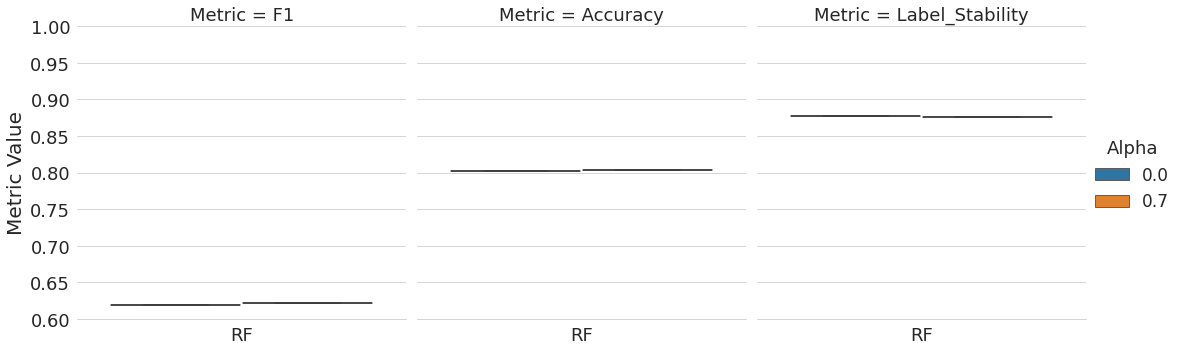

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.6, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

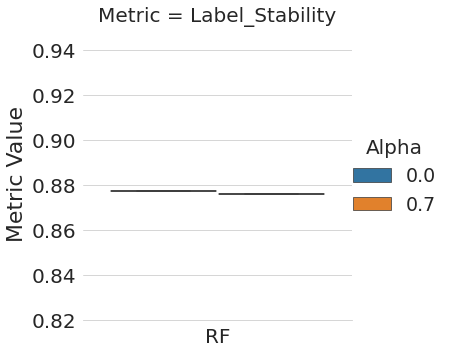

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.82, 0.95),
                                           metric_names=['Label_Stability'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 864x432 with 0 Axes>

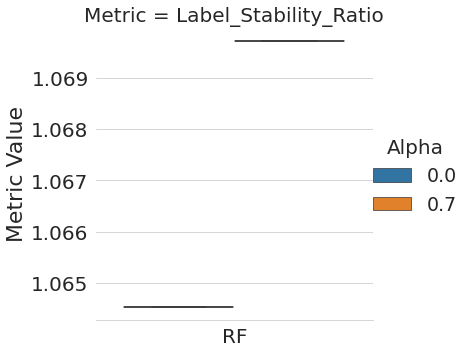

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'],
                                           vals_to_replace=vals_to_replace)

<Figure size 864x432 with 0 Axes>

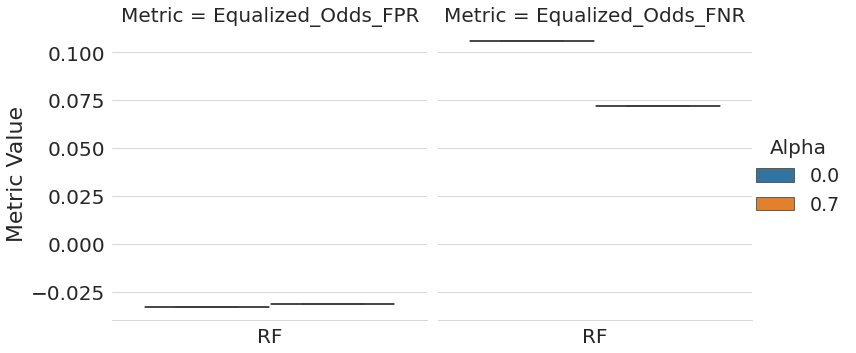

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='RAC1P',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

## Figure 5. Out-of-domain boxplots.

In [23]:
new_vals_to_replace = vals_to_replace
new_vals_to_replace['Test_Set_Index'] = {
    0: 'Poor set',
    1: 'Rich set',
}

<Figure size 864x432 with 0 Axes>

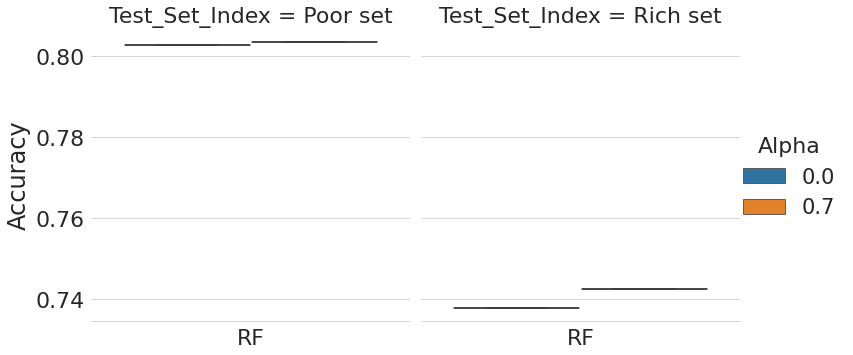

In [24]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Accuracy',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

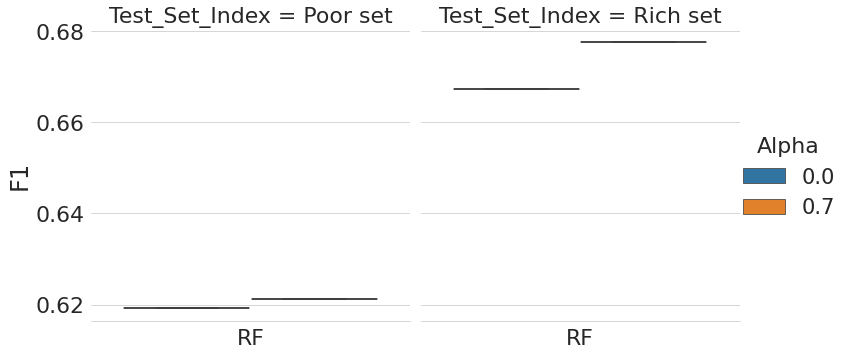

In [25]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='F1',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

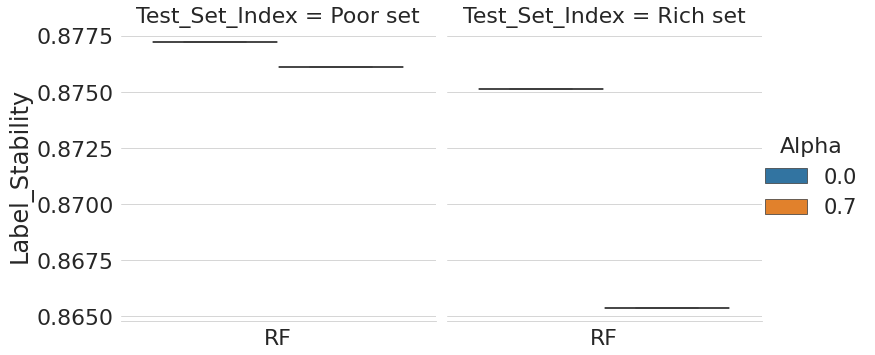

In [26]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Label_Stability',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

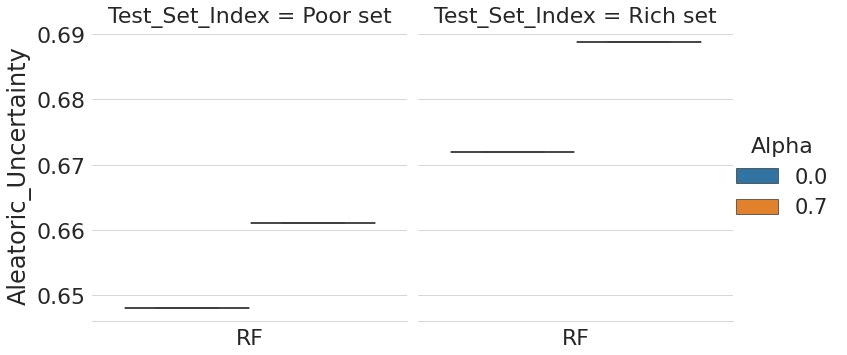

In [27]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Aleatoric_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

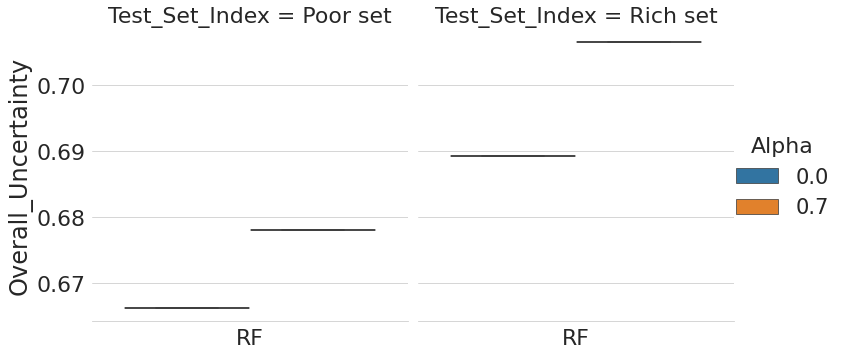

In [28]:
create_group_models_box_plot_per_test_set(melted_all_subgroup_metrics_per_model_dct, metric_name='Overall_Uncertainty',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

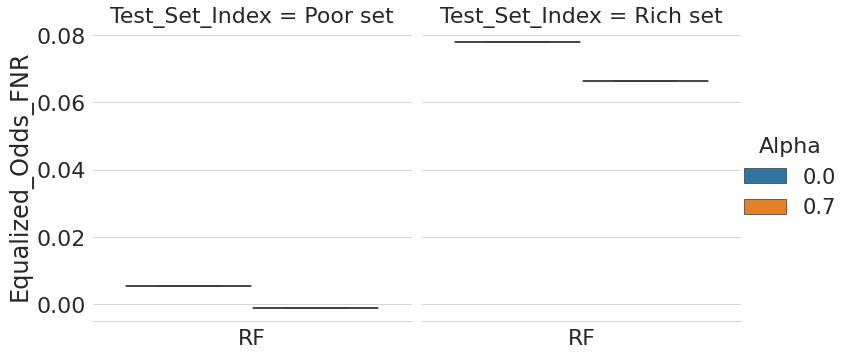

In [29]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='SEX',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

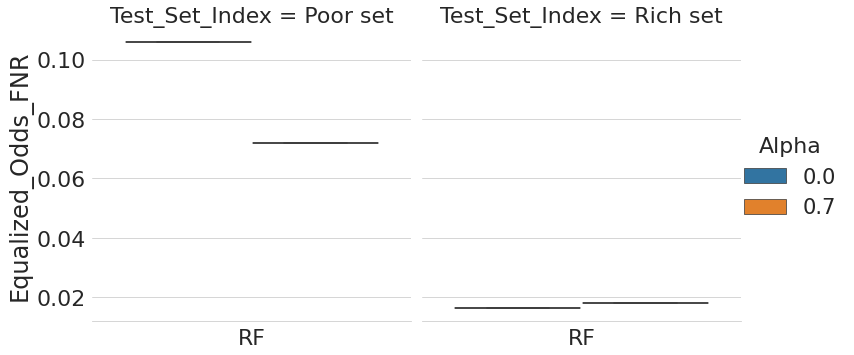

In [30]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FNR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)

<Figure size 864x432 with 0 Axes>

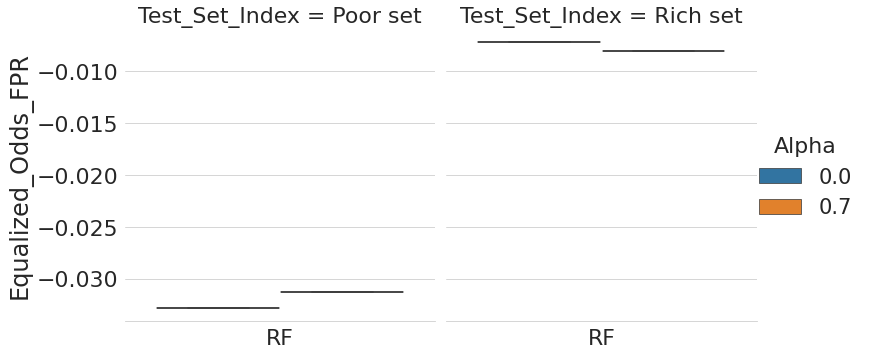

In [31]:
create_group_models_box_plot_per_test_set(melted_all_group_metrics_per_model_dct, metric_name='Equalized_Odds_FPR', group='RAC1P',
                                          vals_to_replace=new_vals_to_replace)